### Import pandas library

This line is to get the pandas tool ready to use in our project.  

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


I open the clean data files for Math and Portuguese using pd.read_csv().
I save the data in math_df and por_df.
Then, I print the shape (size) of each dataset.
This shows how many rows and columns are in the files.
It helps me understand how much data I have before I start working with it.



In [4]:

math_df = pd.read_csv('./data/student_math_clean_new.csv')
por_df = pd.read_csv('./data/student_portuguese_clean_new.csv')
print("Math data size:", math_df.shape)
print("Portuguese data size:", por_df.shape)



Math data size: (395, 34)
Portuguese data size: (649, 34)


I made a small function called preview_dataset() to help me look at my data. It shows the name of the dataset, the size (how many rows and columns), and the first two rows. This helps me understand what is inside the data without writing the same code many times.

In [5]:
def preview_dataset(df, name):
    print(f"Preview of {name} dataset:")
    print(df.shape)
    print(df.head(2))
    print("-" * 40)

# Then call it like this:
preview_dataset(math_df, "Math")
preview_dataset(por_df, "Portuguese")


Preview of Math dataset:
(395, 34)
   student_id school sex  age address_type     family_size    parent_status  \
0           1     GP   F   18        Urban  Greater than 3            Apart   
1           2     GP   F   17        Urban  Greater than 3  Living together   

                mother_education               father_education mother_job  \
0               higher education               higher education    at_home   
1  primary education (4th grade)  primary education (4th grade)    at_home   

   ... family_relationship free_time social weekday_alcohol weekend_alcohol  \
0  ...                   4         3      4               1               1   
1  ...                   5         3      3               1               1   

   health absences grade_1 grade_2 final_grade  
0       3        6       5       6           6  
1       3        4       5       5           6  

[2 rows x 34 columns]
----------------------------------------
Preview of Portuguese dataset:
(649, 34)
  

This function helps to quickly see how many rows and columns the data has, find any missing values in the columns, and know what type of data is in each column.
I use this to understand the data better before working with it.

In [6]:
print(math_df.columns)


Index(['student_id', 'school', 'sex', 'age', 'address_type', 'family_size',
       'parent_status', 'mother_education', 'father_education', 'mother_job',
       'father_job', 'school_choice_reason', 'guardian', 'travel_time',
       'study_time', 'class_failures', 'school_support', 'family_support',
       'extra_paid_classes', 'activities', 'nursery_school', 'higher_ed',
       'internet_access', 'romantic_relationship', 'family_relationship',
       'free_time', 'social', 'weekday_alcohol', 'weekend_alcohol', 'health',
       'absences', 'grade_1', 'grade_2', 'final_grade'],
      dtype='object')


In [7]:
# Select student info columns 
student_info_math = math_df[['student_id', 'school', 'sex', 'age', 'address_type', 'family_size', 'parent_status']]

# Select grades columns
grades_math = math_df[['student_id', 'grade_1', 'grade_2', 'final_grade']]


In [8]:
print(por_df.columns)


Index(['student_id', 'school', 'sex', 'age', 'address_type', 'family_size',
       'parent_status', 'mother_education', 'father_education', 'mother_job',
       'father_job', 'school_choice_reason', 'guardian', 'travel_time',
       'study_time', 'class_failures', 'school_support', 'family_support',
       'extra_paid_classes', 'activities', 'nursery_school', 'higher_ed',
       'internet_access', 'romantic_relationship', 'family_relationship',
       'free_time', 'social', 'weekday_alcohol', 'weekend_alcohol', 'health',
       'absences', 'grade_1', 'grade_2', 'final_grade'],
      dtype='object')


here i  removes the grade columns, so we only keep the student's personal info like school, age, and address(This is for the student table).
after that I  keeps only the grades and the student ID (This is for the grades table).

In [9]:
# Student info columns 
student_info_por = por_df.drop(columns=['grade_1', 'grade_2', 'final_grade'])

# Grades columns
grades_por = por_df[['student_id', 'grade_1', 'grade_2', 'final_grade']]



Here I separate the columns into two tables. One table will have the student information (like age, school, and address_type), and the other one will have the grades. I also add a 'subject' column to say if the data is from Math or Portuguese.


I picked a few columns that describe each student. These will go into my students table. I did this for both math and Portuguese datasets.

In [10]:
# Student info (no grades)
student_columns = ['student_id', 'school', 'sex', 'age', 'address_type']

# Grade info (keep only grades + student_id)
grade_columns = ['student_id', 'grade_1', 'grade_2', 'final_grade']


In this step, I made a new table for grades. I picked the grade columns and added a subject column to know if it’s math or Portuguese.



In [11]:

grades_math = math_df[grade_columns].copy()
grades_math['subject'] = 'math'

grades_por = por_df[grade_columns].copy()
grades_por['subject'] = 'portuguese'


In [12]:
students_math = math_df[['student_id', 'school', 'sex', 'age', 'address_type']]
students_por = por_df[['student_id', 'school', 'sex', 'age', 'address_type']]


I combined both student and grade tables. For the students table, I used drop_duplicates() to make sure each student only shows once.

In [13]:
# Trying to combine student info 
students = pd.concat([students_math, students_por]).drop_duplicates()
grades = pd.concat([grades_math, grades_por])




In this step, I connect to a database using `sqlite3`. If the database file doesn't exist, it will create a new one called `student_performance.db`.


In [14]:
import sqlite3

# Create or connect to the database file
conn = sqlite3.connect('student_performance.db')


Now I will save my `students` and `grades` tables into the database. I use `to_sql()` from pandas to do this. It will create the tables if they don’talready exist. 

In [15]:
# Save students table to database
students.to_sql('students', conn, if_exists='replace', index=False)

# Save grades table to database
grades.to_sql('grades', conn, if_exists='replace', index=False)


1044

I use a simple SQL query to check if the `students` table was saved correctly. This will show the first 5 rows.


In [16]:


query = "SELECT * FROM students LIMIT 5"
pd.read_sql(query, conn)


,student_id,school,sex,age,address_type
0,1,GP,F,18,Urban
1,2,GP,F,17,Urban
2,3,GP,F,15,Urban
3,4,GP,F,15,Urban
4,5,GP,F,16,Urban


exemple: Get all students who are 17 years old:

In [17]:
query = "SELECT * FROM students WHERE age = 17"
result = pd.read_sql(query, conn)
print(result)

     student_id school sex  age address_type
0             2     GP   F   17        Urban
1             8     GP   F   17        Urban
2            19     GP   M   17        Urban
3            79     GP   M   17        Urban
4           119     GP   M   17        Rural
..          ...    ...  ..  ...          ...
250         630     MS   F   17        Rural
251         636     MS   F   17        Rural
252         639     MS   M   17        Urban
253         643     MS   F   17        Urban
254         648     MS   M   17        Urban

[255 rows x 5 columns]


This query joins the `students` table with the `grades` table using the `student_id` column.  
It shows student info along with their grades and the subject.


In [18]:
query = """
SELECT students.student_id, students.school, students.sex, students.age, students.address_type,
       grades.subject, grades.grade_1, grades.grade_2, grades.final_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
LIMIT 40;
"""

joined_data = pd.read_sql(query, conn)
print(joined_data)


    student_id school sex  age address_type     subject  grade_1  grade_2  \
0            1     GP   F   18        Urban  portuguese        0       11   
1            1     GP   F   18        Urban        math        5        6   
2            2     GP   F   17        Urban        math        5        5   
3            2     GP   F   17        Urban  portuguese        9       11   
4            3     GP   F   15        Urban        math        7        8   
5            3     GP   F   15        Urban  portuguese       12       13   
6            4     GP   F   15        Urban  portuguese       14       14   
7            4     GP   F   15        Urban        math       15       14   
8            5     GP   F   16        Urban        math        6       10   
9            5     GP   F   16        Urban  portuguese       11       13   
10           6     GP   M   16        Urban  portuguese       12       12   
11           6     GP   M   16        Urban        math       15       15   

In [19]:
joined_data.to_csv("joined_student_data.csv", index=False)



In [20]:
# Create new column (average grade colomn)
joined_data['average_grade'] = (
    joined_data[['grade_1', 'grade_2', 'final_grade']].astype(float).mean(axis=1)
)


now I created a new column called average_grade in my joined_data DataFrame.
It contains the average of grade_1, grade_2, and final_grade for each student.



In [21]:
'average_grade' in joined_data.columns


True

In [22]:
joined_data.to_csv("joined_student_data_with_avg.csv", index=False)


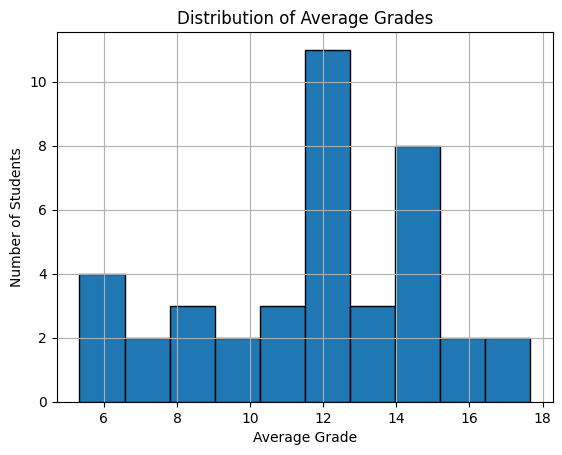

In [23]:

# first making a histogram of average grades
joined_data['average_grade'].hist(bins=10, edgecolor='black')

# then add title and labels so it's clear
plt.title('Distribution of Average Grades')
plt.xlabel('Average Grade')
plt.ylabel('Number of Students')

# final show the chart
plt.show()


I want to compare the average grade in math and Portuguese. This chart helps me see which subject students are doing better in.



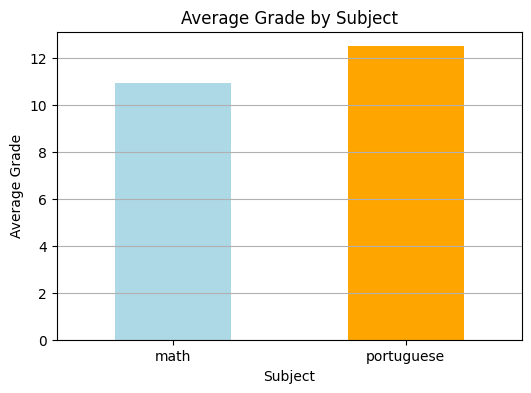

In [24]:
# lets group by subject and find the average of average grades
avg_by_subject = joined_data.groupby('subject')['average_grade'].mean()

# now making a bar chart to show it
avg_by_subject.plot(kind='bar', figsize=(6, 4), color=['lightblue', 'orange'])

# Then add title and labels
plt.title('Average Grade by Subject')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.xticks(rotation=0)
plt.grid(axis='y')

# finally show the chart
plt.show()


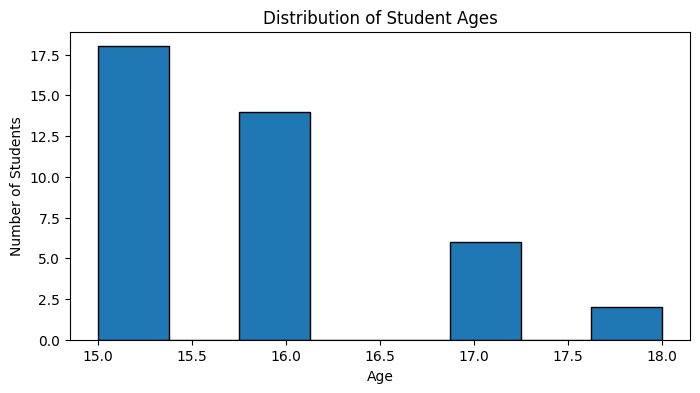

In [25]:

plt.figure(figsize=(8, 4))
joined_data['age'].hist(bins=8, edgecolor='black')
plt.title('Distribution of Student Ages')
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.grid(False)
plt.show()


This chart shows how final grades are different between city (urban) and village (rural) students.
Each box shows the grade range (how low, high), and average grades are.

I use this to check if students from the city or village do better, or if it’s similar.

This chart helps me see if where a student lives affects their grade.



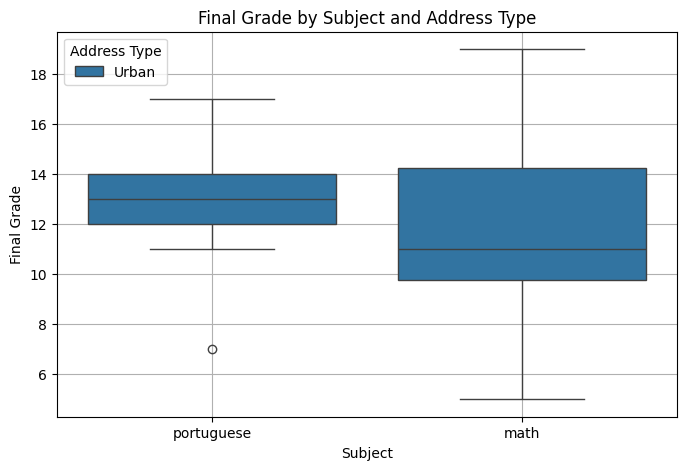

In [26]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=joined_data, x='subject', y='final_grade', hue='address_type')

plt.title('Final Grade by Subject and Address Type')
plt.xlabel('Subject')
plt.ylabel('Final Grade')
plt.legend(title='Address Type')
plt.grid()
plt.show()


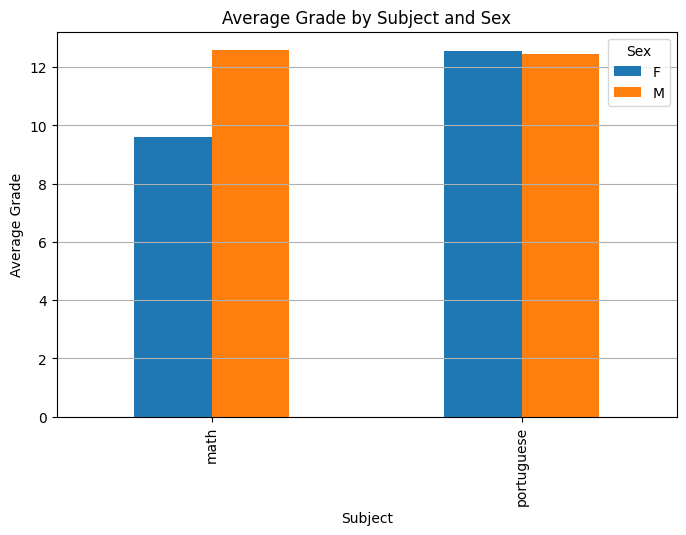

In [29]:
# Fisrt lets group by subject and sex, then calculate mean of average_grade
grouped = joined_data.groupby(['subject', 'sex'])['average_grade'].mean().unstack()

# Plot grouped bar chart
grouped.plot(kind='bar', figsize=(8, 5))

plt.title('Average Grade by Subject and Sex')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.legend(title='Sex')
plt.grid(axis='y')
plt.show()


I want to check if students who do well in the first grade (grade 1) also do well at the end (final grade).
Each dot is a student.

The color of the dot shows if they are male or female.

as a result  the dots go upward (left to right), it means students who did well in the beginning also did well in the end.



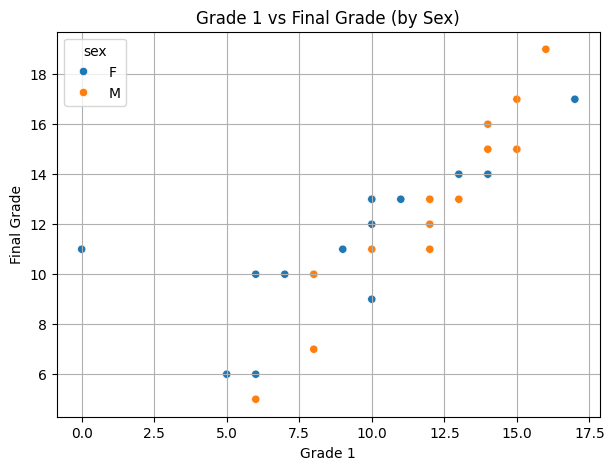

In [28]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=joined_data, x='grade_1', y='final_grade', hue='sex')

plt.title('Grade 1 vs Final Grade (by Sex)')
plt.xlabel('Grade 1')
plt.ylabel('Final Grade')
plt.grid(True)
plt.show()
